###FIS - Mid Term - Mahdi Khalilzadeh - 9932213

#پرسش سه

#3) ب)

مدل‌سازی نورون

In [11]:
import numpy as np

# McCulloch Pitts neuron class
class McCulloch_Pitts_neuron:
    def __init__(self, weights, threshold):
        self.weights = np.array(weights)
        self.threshold = threshold

    def model(self, x):
        if np.dot(self.weights, x) >= self.threshold:
            return 1
        else:
            return 0

مدل‌سازی شبکه MLP

In [44]:
# Define the MLP model
def MLP(x, y):
    # First layer neurons
    neur1 = McCulloch_Pitts_neuron([1, 0], 2)   # Neuron for x = 2
    neur2 = McCulloch_Pitts_neuron([0, 1], 6)   # Neuron for y = 6
    neur3 = McCulloch_Pitts_neuron([-1, 1], -2) # Neuron for y = x + 2
    neur4 = McCulloch_Pitts_neuron([1, 0], 6)   # Neuron for x = 6
    neur5 = McCulloch_Pitts_neuron([0, 1], 2)   # Neuron for y = 2

    # Outputs from the first layer
    z1 = neur1.model(np.array([x, y]))
    z2 = neur2.model(np.array([x, y]))
    z3 = neur3.model(np.array([x, y]))
    z4 = neur4.model(np.array([x, y]))
    z5 = neur5.model(np.array([x, y]))

    # Second layer neurons
    neur6 = McCulloch_Pitts_neuron([1, 1, 1, 0, 0], 3)  # Combine z1, z2, z3
    neur7 = McCulloch_Pitts_neuron([0, 0, 0, 1, 1], 2)  # Combine z4, z5

    z6 = neur6.model(np.array([z1, z2, z3, z4, z5]))
    z7 = neur7.model(np.array([z1, z2, z3, z4, z5]))

    # Output layer
    neur8 = McCulloch_Pitts_neuron([1, 1], 2)  # Combine z6, z7
    final_output = neur8.model(np.array([z6, z7]))

    return final_output


#3) ج)

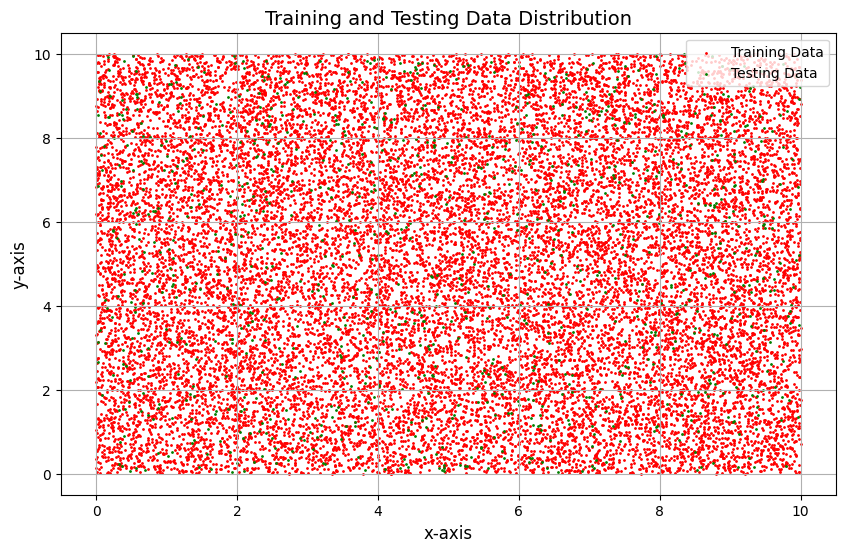

In [28]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate training and testing datasets
np.random.seed(13)  # For reproducibility

# Parameters
n_train = 20000
n_test = 1000
x_min, x_max = 0, 10
y_min, y_max = 0, 10

# Generate random points within the specified range for training
train_x = np.random.uniform(x_min, x_max, n_train)
train_y = np.random.uniform(y_min, y_max, n_train)

# Generate random points within the specified range for testing
test_x = np.random.uniform(x_min, x_max, n_test)
test_y = np.random.uniform(y_min, y_max, n_test)

# Combine into datasets
train_data = pd.DataFrame({'x': train_x, 'y': train_y})
test_data = pd.DataFrame({'x': test_x, 'y': test_y})

# Save datasets to CSV files if needed
train_data.to_csv('training_data.csv', index=False)
test_data.to_csv('testing_data.csv', index=False)

# Plot the training and testing data
plt.figure(figsize=(10, 6))

# Training data in red
plt.scatter(train_data['x'], train_data['y'], color='red', s=1, label='Training Data')

# Testing data in green
plt.scatter(test_data['x'], test_data['y'], color='green', s=1, label='Testing Data')

# Formatting the plot
plt.title('Training and Testing Data Distribution', fontsize=14)
plt.xlabel('x-axis', fontsize=12)
plt.ylabel('y-axis', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

#3) د)

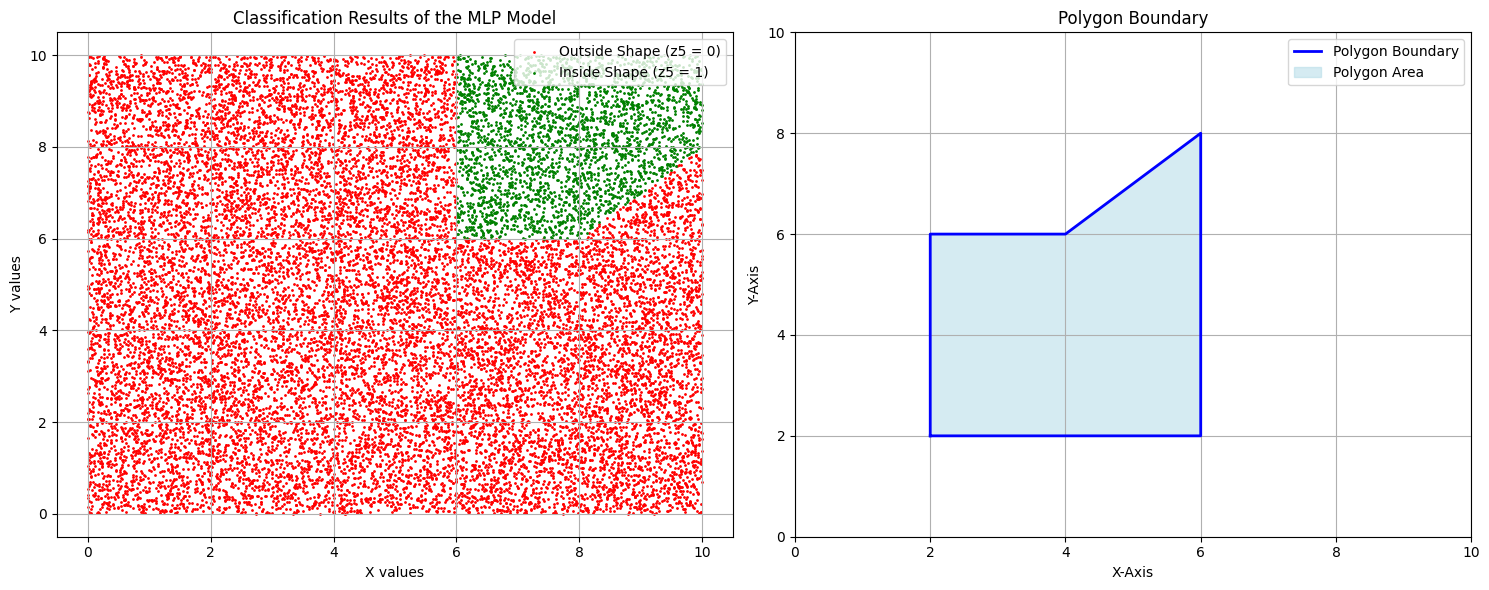

In [46]:
# Evaluate training data using the MLP model
red_points = []
green_points = []

for i in range(n_train):
    x = train_x[i]
    y = train_y[i]
    z5_value = MLP(x, y)
    if z5_value == 0:  # Outside the shape
        red_points.append((x, y))
    else:  # Inside the shape
        green_points.append((x, y))

# Separate x and y values for red and green points
if red_points:  # Avoid empty list unpacking
    red_x, red_y = zip(*red_points)
else:
    red_x, red_y = [], []
if green_points:
    green_x, green_y = zip(*green_points)
else:
    green_x, green_y = [], []

# Define polygon boundaries
polygon_vertices = np.array([
    [2, 2],  # Bottom-left
    [2, 6],  # Top-left
    [4, 6],  # Top-middle
    [6, 8],  # Top-right
    [6, 2],  # Bottom-right
])

# Separate x and y for the polygon
poly_x, poly_y = polygon_vertices[:, 0], polygon_vertices[:, 1]

# Close the polygon by connecting the last point to the first
poly_x = np.append(poly_x, poly_x[0])
poly_y = np.append(poly_y, poly_y[0])

# Plot the results
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Left side: Scatter plot for MLP classification
ax[0].scatter(red_x, red_y, color='red', label='Outside Shape (z5 = 0)', s=1)
ax[0].scatter(green_x, green_y, color='green', label='Inside Shape (z5 = 1)', s=1)
ax[0].set_xlabel('X values')
ax[0].set_ylabel('Y values')
ax[0].set_title('Classification Results of the MLP Model')
ax[0].legend(loc='upper right')
ax[0].grid(True)

# Right side: Polygon boundary
ax[1].plot(poly_x, poly_y, color='blue', linewidth=2, label='Polygon Boundary')
ax[1].fill(poly_x, poly_y, color='lightblue', alpha=0.5, label='Polygon Area')
ax[1].set_xlim(0, 10)
ax[1].set_ylim(0, 10)
ax[1].set_xlabel('X-Axis')
ax[1].set_ylabel('Y-Axis')
ax[1].set_title('Polygon Boundary')
ax[1].legend(loc='upper right')
ax[1].grid(True)

plt.tight_layout()
plt.savefig('MLP_with_Polygon_Boundary.png', bbox_inches='tight')
plt.show()

#3) ه)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7443 - loss: 0.6544 - val_accuracy: 0.8350 - val_loss: 0.5478
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8588 - loss: 0.5113 - val_accuracy: 0.8350 - val_loss: 0.4814
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8626 - loss: 0.4440 - val_accuracy: 0.8350 - val_loss: 0.4560
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8634 - loss: 0.4151 - val_accuracy: 0.8350 - val_loss: 0.4487
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8608 - loss: 0.4082 - val_accuracy: 0.8350 - val_loss: 0.4480
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8647 - loss: 0.3982 - val_accuracy: 0.8350 - val_loss: 0.4488
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8631 - loss: 0.3998 - val_accuracy: 0.8350 - val_loss: 0.4494
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8609 - loss: 0.4034 - val_accuracy: 0.8350 - val_

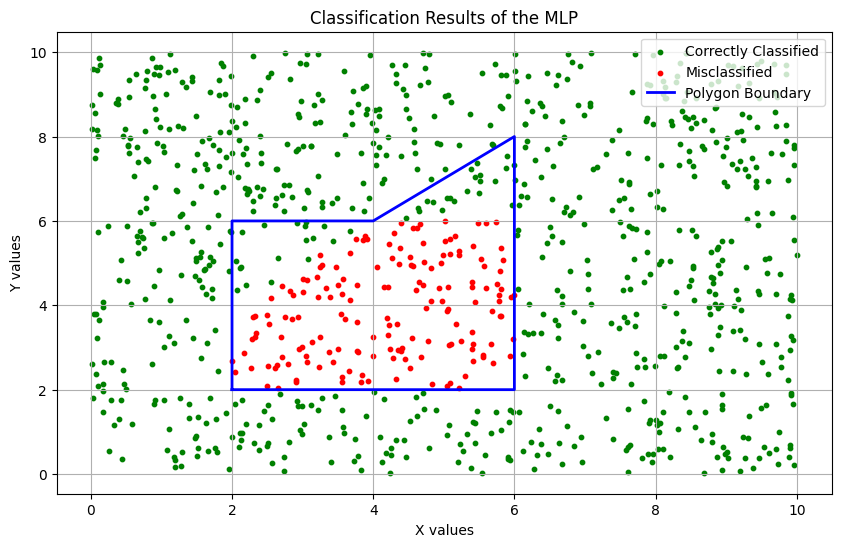

In [47]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)

# Generate training data (20,000 points)
n_train = 20000
x_train = np.random.uniform(0, 10, (n_train, 2))  # 2D points in range [0, 10]
y_train = np.logical_and.reduce([
    x_train[:, 0] >= 2,           # x >= 2
    x_train[:, 0] <= 6,           # x <= 6
    x_train[:, 1] >= 2,           # y >= 2
    x_train[:, 1] <= x_train[:, 0] + 2,  # y <= x + 2
    x_train[:, 1] <= 6            # y <= 6
]).astype(int)

# Generate testing data (1,000 points)
n_test = 1000
x_test = np.random.uniform(0, 10, (n_test, 2))
y_test = np.logical_and.reduce([
    x_test[:, 0] >= 2,
    x_test[:, 0] <= 6,
    x_test[:, 1] >= 2,
    x_test[:, 1] <= x_test[:, 0] + 2,
    x_test[:, 1] <= 6
]).astype(int)

# Build the MLP model
model = Sequential([
    Dense(5, activation='relu', input_dim=2),  # First hidden layer with 5 neurons
    Dense(2, activation='relu'),               # Second hidden layer with 2 neurons
    Dense(1, activation='sigmoid')             # Output layer with sigmoid activation
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), verbose=1)

# Evaluate the model
train_accuracy = model.evaluate(x_train, y_train, verbose=0)[1]
test_accuracy = model.evaluate(x_test, y_test, verbose=0)[1]
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Generate predictions for the test set
y_pred = model.predict(x_test).flatten()
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary classes

# Plot the results
plt.figure(figsize=(10, 6))

# Correctly classified points
correct_points = x_test[y_pred == y_test]
incorrect_points = x_test[y_pred != y_test]

# Plot the classified points
plt.scatter(correct_points[:, 0], correct_points[:, 1], color='green', label='Correctly Classified', s=10)
plt.scatter(incorrect_points[:, 0], incorrect_points[:, 1], color='red', label='Misclassified', s=10)

# Add the polygon boundary
polygon_vertices = np.array([[2, 2], [2, 6], [4, 6], [6, 8], [6, 2]])
plt.plot(
    np.append(polygon_vertices[:, 0], polygon_vertices[0, 0]),
    np.append(polygon_vertices[:, 1], polygon_vertices[0, 1]),
    color='blue', linewidth=2, label='Polygon Boundary'
)

plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Classification Results of the MLP')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


#پرسش چهار


In [50]:
!pip install --upgrade --no-cache-dir gdown

import gdown
import pandas as pd

In [51]:
# link from google drive: https://drive.google.com/file/d/1wRR_5T_RZzNkpRiv3sqPbg69iwSwWyGH/view?usp=sharing

file_id = "1wRR_5T_RZzNkpRiv3sqPbg69iwSwWyGH"
url = f"https://drive.google.com/uc?id={file_id}"

# File Direction
File_dir = "/content/Admission_Predict.csv"
gdown.download(url, File_dir, quiet=False)
# move to dataframe
df = pd.read_csv('Admission_Predict.csv')
df.head()

Downloading...
From: https://drive.google.com/uc?id=1wRR_5T_RZzNkpRiv3sqPbg69iwSwWyGH
To: /content/Admission_Predict.csv
100%|██████████| 12.9k/12.9k [00:00<00:00, 3.35MB/s]


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


#4-آ

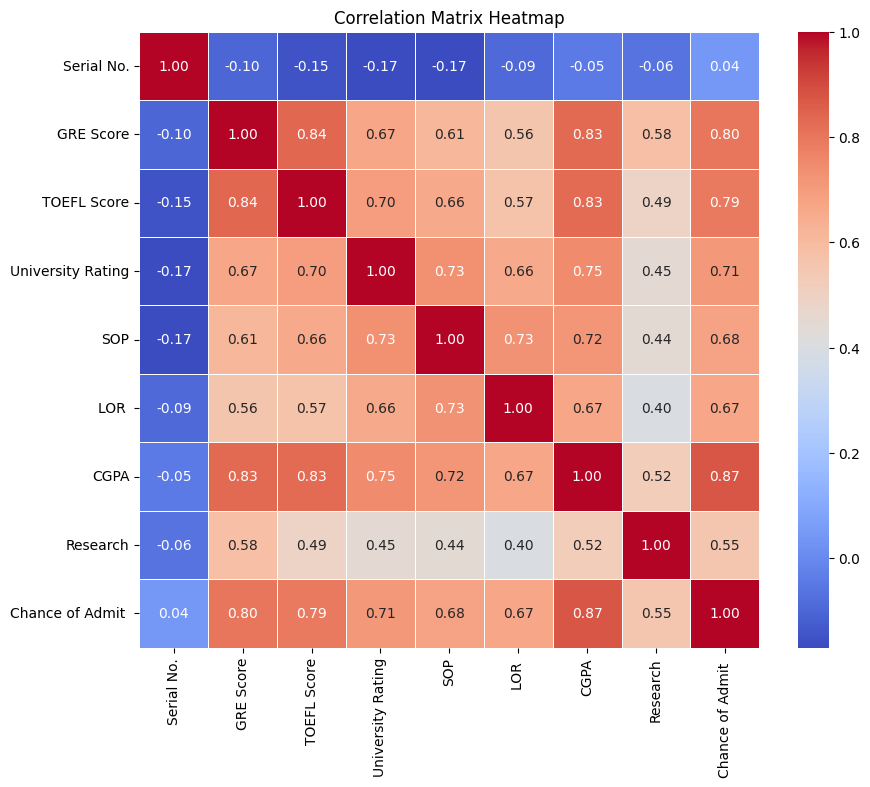

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

ب

In [60]:
y = df["Chance of Admit "]

target_analysis = y.value_counts()
# Splitting data
from sklearn.model_selection import train_test_split

X = df.drop("Chance of Admit ", axis=1)
y = df["Chance of Admit "]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

print("Training Set Size:", X_train.shape)
print("Test Set Size:", X_test.shape)

Training Set Size: (340, 8)
Test Set Size: (60, 8)


In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_normalized = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)ُ
X_test_normalized = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

print("Normalized Training Data (First 5 Rows):")
print(X_train_normalized.head())

print("\nNormalized Test Data (First 5 Rows):")
print(X_test_normalized.head())

Normalized Training Data (First 5 Rows):
   Serial No.  GRE Score  TOEFL Score  University Rating    SOP   LOR   \
0    0.309045       0.22     0.500000               0.75  0.375  0.500   
1    0.736181       0.52     0.321429               0.25  0.375  0.250   
2    0.638191       0.34     0.642857               0.75  0.750  0.875   
3    0.193467       0.12     0.107143               0.25  0.500  0.250   
4    0.251256       0.44     0.464286               0.25  0.375  0.500   

       CGPA  Research  
0  0.535256       0.0  
1  0.487179       1.0  
2  0.503205       0.0  
3  0.237179       1.0  
4  0.423077       0.0  

Normalized Test Data (First 5 Rows):
   Serial No.  GRE Score  TOEFL Score  University Rating    SOP  LOR   \
0    0.522613       0.22     0.428571               0.50  0.625  0.75   
1    0.701005       0.42     0.357143               0.50  0.875  0.75   
2    0.080402       1.00     0.785714               1.00  0.750  0.75   
3    0.525126       0.70     0.571429   